# Задача 12
Предсказать сорт винограда из которого сделано вино, используя [результаты химических анализов](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [128]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, metrics
from matplotlib import pyplot as plt

%matplotlib inline

In [129]:
wines = pd.read_csv('../Documents/wines_data.csv', sep=';')
wines.head()
y = wines['Type']
X = wines.drop('Type', axis=1)

Разделяем на тестовую и тренеровочную, пусть тестовая - 33%

In [165]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=50)
max_neigbors = int(len(X_train)/2)

Будем решать задачу для трех метрик
1. евклидова
2. чебышева
3. минковского с параметром = 5

В силу небольшого количества данных ограничем количество соседей половиной тренировочной выборки (где-то 60 соседей)

In [181]:
metricas = ["euclidean", "chebyshev", "minkowski"]
metricas_params=["", "", " 5"]
mistakes = [[],[],[]]
for i in range(3):
    for neighbors in range(3, max_neigbors):
        if (i == 2):
            classifier = KNeighborsClassifier(n_neighbors=neighbors, metric=metricas[i], p=int(metricas_params[i]))
        else:
            classifier = KNeighborsClassifier(n_neighbors=neighbors, metric=metricas[i])
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        mistakes[i].append((y_pred != y_test).sum())

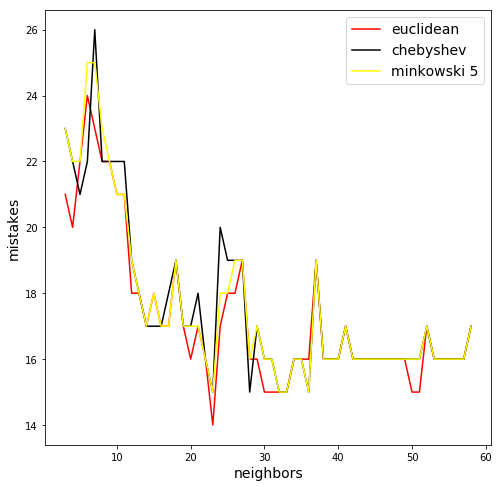

In [182]:
plt.figure(figsize=(8, 8))
colors = ['red', 'black', 'yellow']
for i in range(3): 
    plt.plot(range(3, max_neigbors), mistakes[i], color=colors[i], label=metricas[i]+metricas_params[i])
plt.xlabel('neighbors', fontsize=14)
plt.ylabel('mistakes', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

Видим, что минимум для всех метрик достигается при k ~ 23